<a href="https://colab.research.google.com/github/sira-code/DS-ML-PY-projects-/blob/master/ANZ_INTERNSHIP_TASK_1_AND_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#IMPORTING LIBRARIES:

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
#LOAD THE DATA

In [41]:
df = pd.read_csv("ANZ.csv")
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,8/1/2018,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,8/1/2018,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,8/1/2018,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,8/1/2018,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,8/1/2018,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [42]:
# DESCRIBE DATA

In [43]:
df.shape

(12043, 23)

In [44]:
df.describe(include='all')

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
count,12043,7717.000000,885,12043,12043,12043,12043,7717,883.0,12043,12043.000000,12043,12043,12043.000000,7717,7717,12043,12043.000000,12043,12043,12043,7717,12043
unique,2,NaN,3,100,1,100,6,5725,NaN,80,NaN,91,2,NaN,1609,8,9442,NaN,12043,1,100,2703,2
top,authorized,NaN,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,NaN,Michael,NaN,9/28/2018,M,NaN,Melbourne,NSW,2018-09-03T11:00:00.000+0000,NaN,1ac5e6c847844edeb61242dd28b622c2,Australia,CUS-2487424745,151.21 -33.87,debit
freq,7717,NaN,883,578,12043,578,3934,14,NaN,746,NaN,174,6285,NaN,255,2169,10,NaN,1,12043,578,145,11160
mean,NaN,0.802644,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,14704.195553,NaN,NaN,30.582330,NaN,NaN,NaN,187.933588,NaN,NaN,NaN,NaN,NaN
std,NaN,0.398029,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,31503.722652,NaN,NaN,10.046343,NaN,NaN,NaN,592.599934,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.240000,NaN,NaN,18.000000,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,3158.585000,NaN,NaN,22.000000,NaN,NaN,NaN,16.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,6432.010000,NaN,NaN,28.000000,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,12465.945000,NaN,NaN,38.000000,NaN,NaN,NaN,53.655000,NaN,NaN,NaN,NaN,NaN


In [45]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

In [47]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [48]:
#EXPLORATORY DATA ANALYSIS(EDA)

In [49]:
type(df['date'])

pandas.core.series.Series

In [50]:
df['date']=pd.to_datetime(df['date'])

In [51]:
df.head(3)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit


In [52]:
df['weekday']=df['date'].dt.day_name()

In [53]:
df.weekday.head(10)

0    Wednesday
1    Wednesday
2    Wednesday
3    Wednesday
4    Wednesday
5    Wednesday
6    Wednesday
7    Wednesday
8    Wednesday
9    Wednesday
Name: weekday, dtype: object

In [54]:
df['monthname']=df['date'].dt.month_name()

In [55]:
df.monthname.head(10)

0    August
1    August
2    August
3    August
4    August
5    August
6    August
7    August
8    August
9    August
Name: monthname, dtype: object

In [56]:
df.corr()

,card_present_flag,merchant_code,balance,age,amount
card_present_flag,1.000000,NaN,0.005925,-0.008405,-0.002074
merchant_code,NaN,NaN,NaN,NaN,NaN
balance,0.005925,NaN,1.000000,0.199329,0.059178
age,-0.008405,NaN,0.199329,1.000000,0.029980
amount,-0.002074,NaN,0.059178,0.029980,1.000000


In [57]:
import seaborn as sns

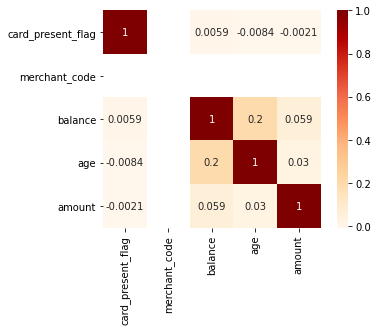

In [58]:
corr = df.corr()
ax = sns.heatmap(corr,cmap='OrRd',annot=True,square= True)

In [59]:
#FINDING THE MAX AND MIN TRANSACTION OF EACH MONTH

In [68]:
oct = df[df['monthname']=='October']
oct.loc[:,'amount'].mean()

196.42732321996542

In [70]:
#oct.loc[:,'amount'].min()
oct.loc[:,'amount'].max()

8835.98

In [71]:
oct.loc[:,'amount'].min()

0.1

In [72]:
sept = df[df['monthname']=='September']
sept.loc[:,'amount'].mean()

182.04590331422853

In [73]:
sept.loc[:,'amount'].max()

8835.98

In [74]:
sept.loc[:,'amount'].min()

0.1

In [75]:
aug = df[df['monthname']=='August']
aug.loc[:,'amount'].mean()

185.12186659903654

In [76]:
aug.loc[:,'amount'].max()

8835.98

In [77]:
aug.loc[:,'amount'].min()

1.52

In [78]:
df['gender'].value_counts()

M    6285
F    5758
Name: gender, dtype: int64

Text(0.5, 1.0, 'MALE VS FEMALE  CUSTOMERS')

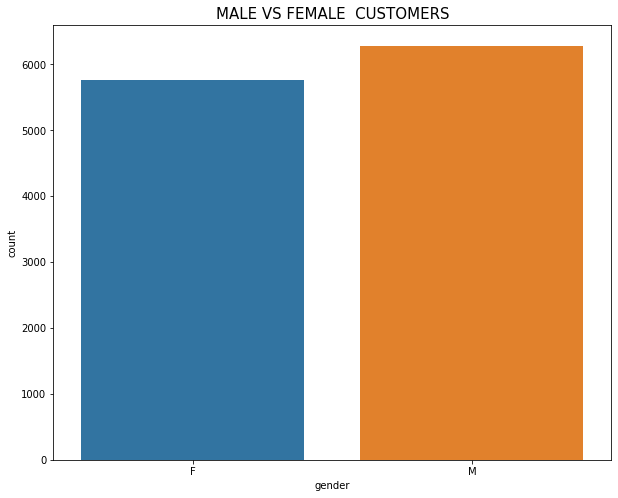

In [79]:
plt.figure(figsize=(10,8))
sns.countplot(df['gender'])
plt.title('MALE VS FEMALE  CUSTOMERS',fontsize=15)

In [81]:
df['monthname'].value_counts()

October      4087
September    4013
August       3943
Name: monthname, dtype: int64

Text(0.5, 1.0, 'TOTAL MONTHLY TRANSACTIONS')

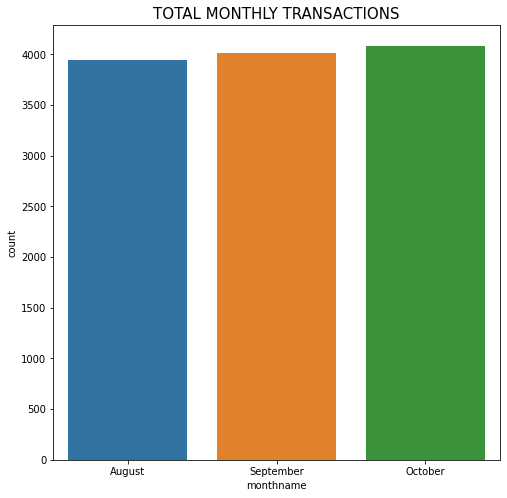

In [82]:
plt.figure(figsize=(8,8))
sns.countplot(df['monthname'])
plt.title('TOTAL MONTHLY TRANSACTIONS',fontsize=15)

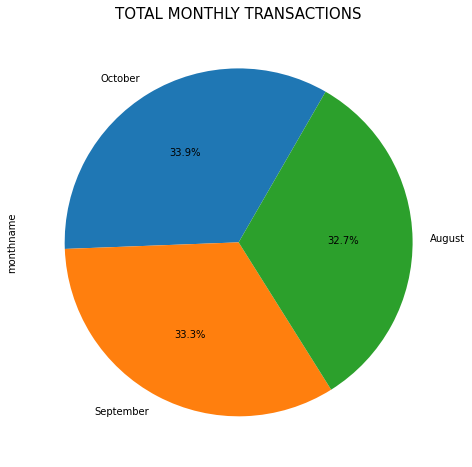

In [86]:
plt.figure(figsize=(8,8))
explode = (0.1,0.5,0.05)
df['monthname'].value_counts().plot.pie(autopct= '%1.1f%%',startangle=60)
plt.title('TOTAL MONTHLY TRANSACTIONS',fontsize=15)
plt.show()

Text(0.5, 1.0, 'AGE GROUPS WITH BALANCE')

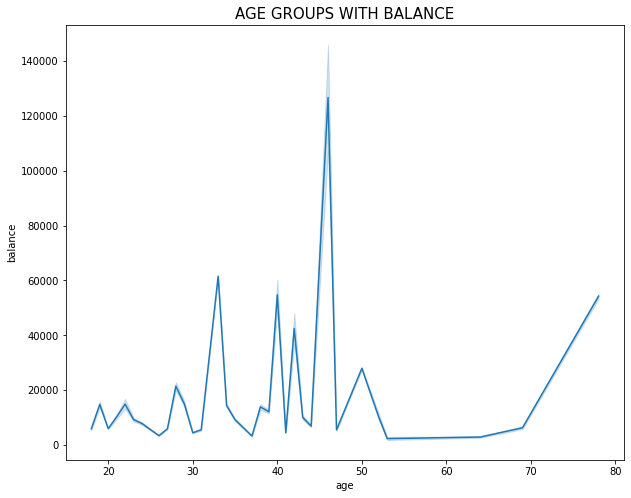

In [87]:
plt.figure(figsize=(10,8))
sns.lineplot(x='age',y='balance',data=df)
plt.title('AGE GROUPS WITH BALANCE',fontsize=15)

Text(0.5, 1.0, 'MONTHTY TRANSACTIONS ON GENDER BASIS')

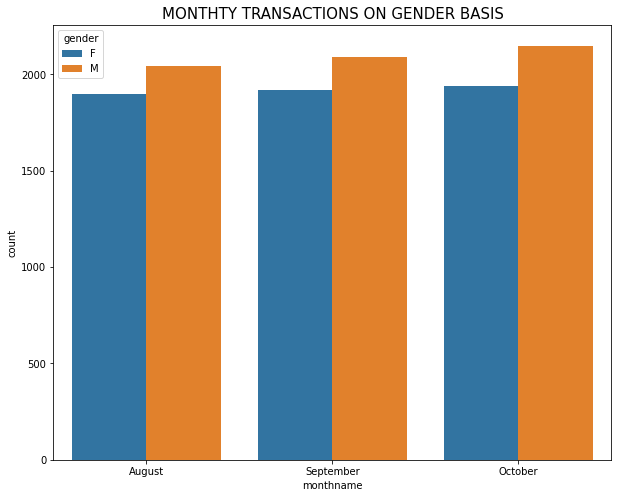

In [88]:
plt.figure(figsize=(10,8))
sns.countplot(df['monthname'],hue=df['gender'])
plt.title('MONTHTY TRANSACTIONS ON GENDER BASIS',fontsize=15)

In [90]:
df['weekday'].value_counts()

Friday       2073
Wednesday    2063
Thursday     1801
Saturday     1709
Sunday       1550
Tuesday      1487
Monday       1360
Name: weekday, dtype: int64

Text(0.5, 1.0, 'TRANSACTIONS ON DAILY BASIS')

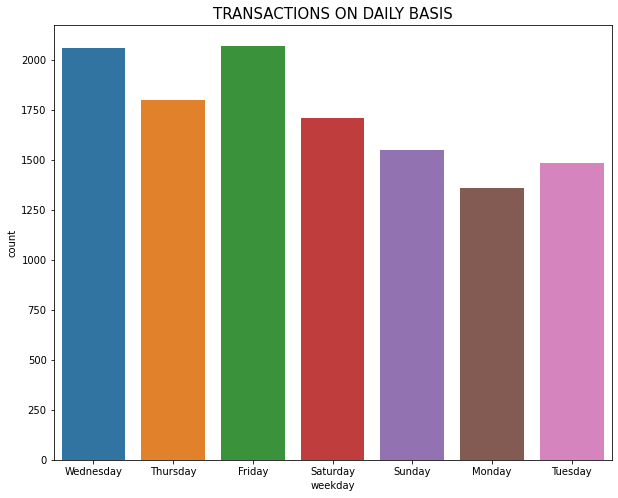

In [91]:
plt.figure(figsize=(10,8))
sns.countplot(df['weekday'])
plt.title('TRANSACTIONS ON DAILY BASIS',fontsize=15)

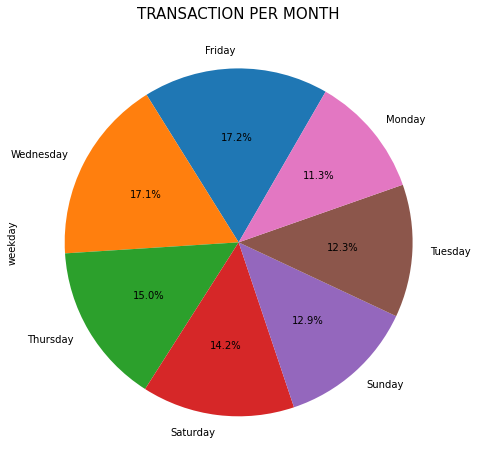

In [92]:
plt.figure(figsize=(8,8))
df['weekday'].value_counts().plot.pie(autopct= '%1.1f%%',startangle=60)
plt.title('TRANSACTION PER MONTH',fontsize=15)
plt.show()

Text(0.5, 1.0, 'DAILY TRANSACTIONS ON GENDER BASIS')

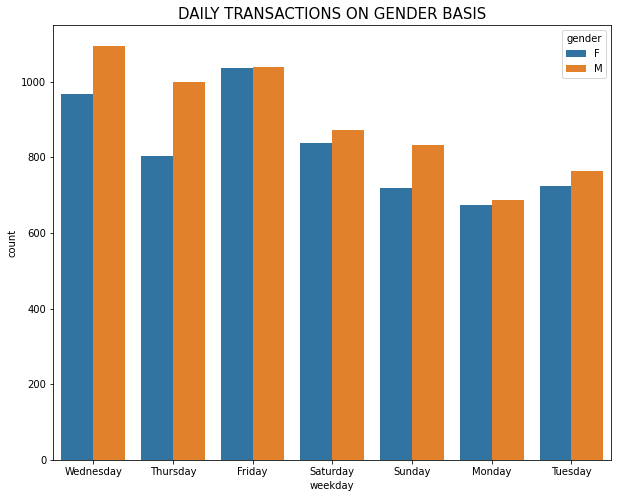

In [93]:
plt.figure(figsize=(10,8))
sns.countplot(df['weekday'],hue=df['gender'])
plt.title('DAILY TRANSACTIONS ON GENDER BASIS',fontsize=15)

In [94]:
df['card_present_flag'].value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

Text(0.5, 1.0, 'CARD PAYMENT VS NO CARD PAYMENT')

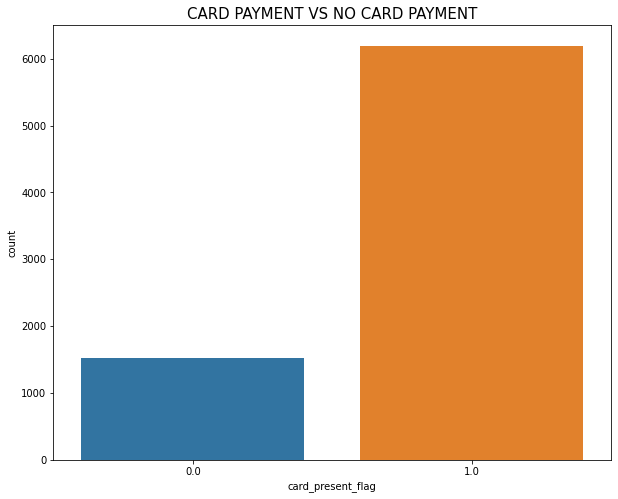

In [96]:
plt.figure(figsize=(10,8))
sns.countplot(df['card_present_flag'])
plt.title('CARD PAYMENT VS NO CARD PAYMENT',fontsize=15)

In [97]:
df['movement'].value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

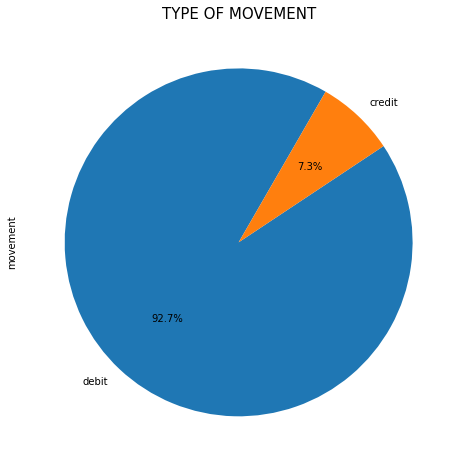

In [98]:
plt.figure(figsize=(8,8))
df['movement'].value_counts().plot.pie(autopct= '%1.1f%%',startangle=60)
plt.title('TYPE OF MOVEMENT',fontsize=15)
plt.show()

Text(0.5, 1.0, 'MODE OF MOVEMENT')

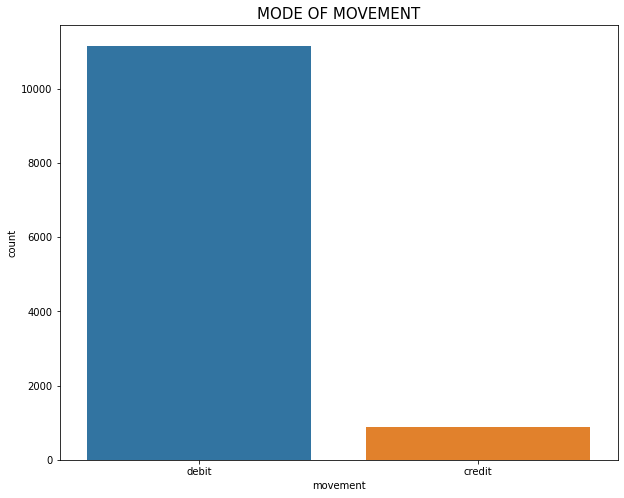

In [99]:
plt.figure(figsize=(10,8))
sns.countplot(df['movement'])
plt.title('MODE OF MOVEMENT',fontsize=15)

In [100]:
df['merchant_state'].value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

Text(0.5, 1.0, 'STATE WISE TRANSACTIONS')

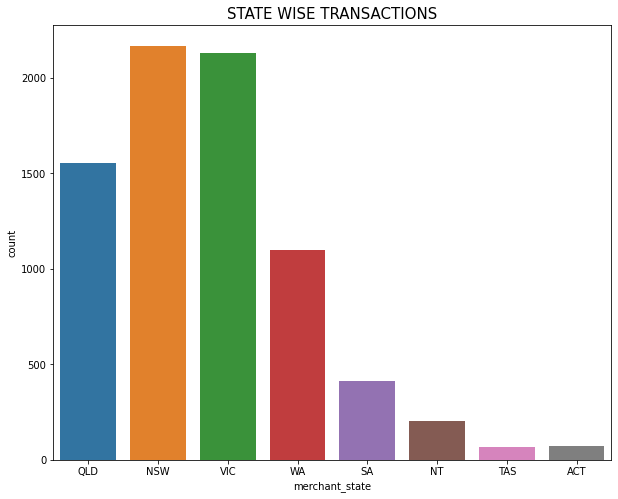

In [101]:
plt.figure(figsize=(10,8))
sns.countplot(df['merchant_state'])
plt.title('STATE WISE TRANSACTIONS',fontsize=15)

In [102]:
df['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

Text(0.5, 1.0, ' TRANSACTIONS DESCRIPTION')

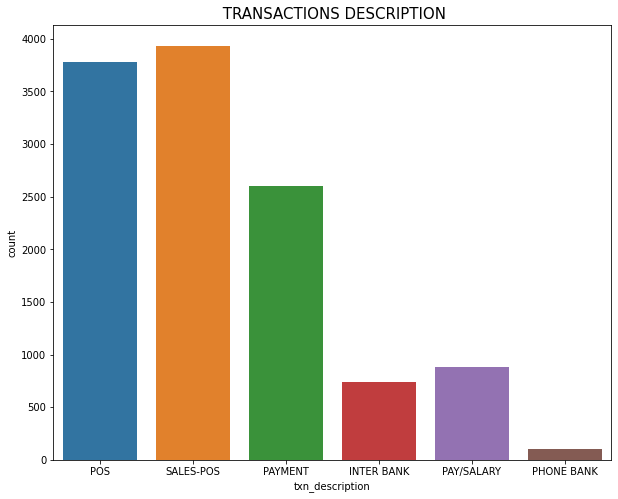

In [103]:
plt.figure(figsize=(10,8))
sns.countplot(df['txn_description'])
plt.title(' TRANSACTIONS DESCRIPTION',fontsize=15)

In [104]:
df['first_name'].value_counts()

Michael      746
Diana        578
Jessica      408
Joseph       391
Jeffrey      388
            ... 
Cindy         51
Elizabeth     44
David         40
Andrew        34
Jonathan      31
Name: first_name, Length: 80, dtype: int64

In [106]:
top = df['first_name'].value_counts(sort = True).head(15)
top

Michael        746
Diana          578
Jessica        408
Joseph         391
Jeffrey        388
Richard        364
Kimberly       343
Tonya          292
Susan          282
Christopher    263
Rhonda         259
Ryan           239
Tiffany        230
Tyler          218
Kenneth        214
Name: first_name, dtype: int64

[Text(0, 0.5, 'NAME OF CUSTOMERS'),
 Text(0.5, 0, 'NO. OF TRANSACTIONS MADE'),
 Text(0.5, 1.0, 'TOP 15 CUSTOMERS')]

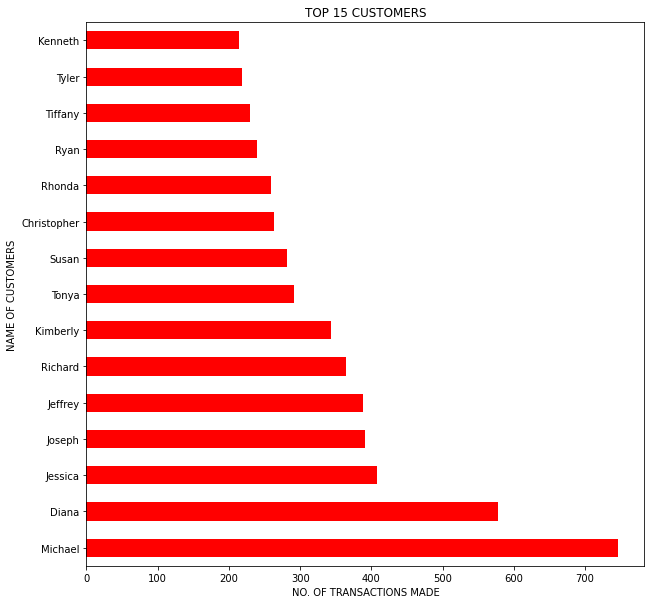

In [109]:
f,ax= plt.subplots(figsize=(10,10))
top.plot.barh(color = 'red')
ax.set(title='TOP 15 CUSTOMERS',xlabel = 'NO. OF TRANSACTIONS MADE',ylabel = 'NAME OF CUSTOMERS')

In [110]:
#TIME SERIES ANALYSIS

In [111]:
df['date'].value_counts(sort=True)

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

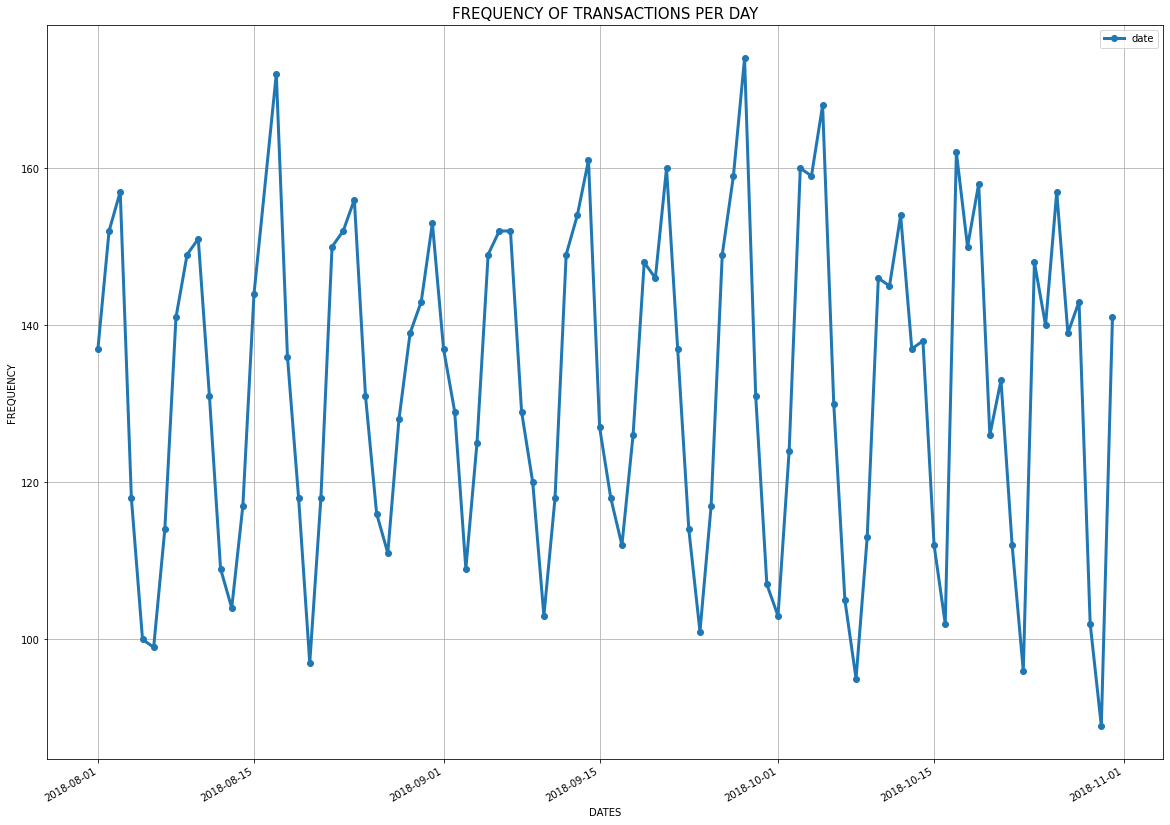

In [113]:
df['date'].value_counts(sort=True).plot(kind='line',linewidth= 3,linestyle='-',marker ='o',figsize=(20,15))
plt.xlabel('DATES')
plt.ylabel('FREQUENCY')
plt.title('FREQUENCY OF TRANSACTIONS PER DAY',fontsize = 15)
plt.legend()
plt.grid(True)
plt.show()

In [114]:
#PREDICTIVE ANALYSIS

In [115]:
data = df

In [117]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement', 'weekday', 'monthname'],
      dtype='object')

In [118]:
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
weekday                  0
monthname                0
dtype: int64

In [119]:
data['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [122]:
salarydata= data[data['txn_description']=='PAY/SALARY'].groupby('customer_id').mean()

In [123]:
salarydata

,card_present_flag,merchant_code,balance,age,amount
customer_id,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53,970.47
CUS-1117979751,NaN,0.0,11957.202857,21,3578.65
CUS-1140341822,NaN,0.0,5841.720000,28,1916.51
CUS-1147642491,NaN,0.0,8813.467692,34,1711.39
CUS-1196156254,NaN,0.0,23845.717143,34,3903.73
...,...,...,...,...,...
CUS-72755508,NaN,0.0,4558.675833,35,725.32
CUS-809013380,NaN,0.0,5579.186154,21,1037.07
CUS-860700529,NaN,0.0,4221.468333,30,1808.62


In [133]:
salaries = []
for customer_id in df["customer_id"]:
    salaries.append(int(salarydata.loc[customer_id]["amount"]))
df["annual_salary"] = salaries

In [134]:
cus = df.groupby("customer_id").mean()
cus.head()

,card_present_flag,merchant_code,balance,age,amount,annual_salary
customer_id,,,,,,
CUS-1005756958,0.812500,0.0,2275.852055,53,222.862603,970
CUS-1117979751,0.826923,0.0,9829.929000,21,339.843700,3578
CUS-1140341822,0.815385,0.0,5699.212250,28,212.632500,1916
CUS-1147642491,0.750000,0.0,9032.841186,34,245.600169,1711
CUS-1196156254,0.785276,0.0,22272.433755,34,147.145796,3903


In [135]:
print(data['age'].corr(data['balance']))

0.19932925225498474


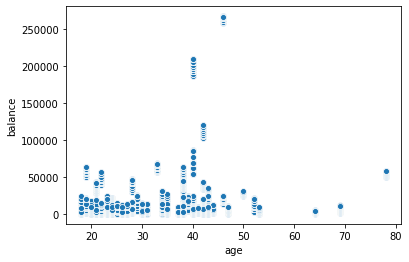

In [136]:
sns.scatterplot(x=data.age,y = data.balance)

In [142]:
salarydata.columns

Index(['card_present_flag', 'merchant_code', 'balance', 'age', 'amount'], dtype='object')

In [145]:
j=[]
for customer_id in df['customer_id']:
  j.append(int(salarydata.loc[customer_id]['amount'].mean()))
df['annual_salary'] =j

In [146]:
df

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,weekday,monthname,annual_salary
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,Wednesday,August,1013
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,Wednesday,August,1013
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,Wednesday,August,1002
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,Wednesday,August,892
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,Wednesday,August,1013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,14054.14,2018-10-31,F,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit,Wednesday,October,1636
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,9137.79,2018-10-31,M,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit,Wednesday,October,2320
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,45394.57,2018-10-31,M,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit,Wednesday,October,4054
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,11350.67,2018-10-31,M,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit,Wednesday,October,1043


In [148]:
predsalary = df[df['txn_description']=='PAY/SALARY']

In [149]:
predsalary

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,weekday,monthname,annual_salary
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,8342.11,2018-08-01,M,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit,Wednesday,August,3903
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,2040.58,2018-08-01,F,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit,Wednesday,August,1626
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,3158.51,2018-08-01,M,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit,Wednesday,August,983
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,2517.66,2018-08-01,M,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit,Wednesday,August,1408
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,2271.79,2018-08-01,F,43,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit,Wednesday,August,1068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,posted,NaN,0,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,NaN,0.0,Antonio,9378.51,2018-10-31,M,26,NaN,NaN,2018-10-31T16:00:00.000+0000,1098.91,0e6cffb4401043c891ab7a50ec594208,Australia,CUS-1646621553,NaN,credit,Wednesday,October,1098
12000,posted,NaN,0,ACC-819621312,AUD,145.04 -37.85,PAY/SALARY,NaN,0.0,Michele,3440.01,2018-10-31,F,30,NaN,NaN,2018-10-31T17:00:00.000+0000,1158.15,ad13e06fffba4771b3c994f9147e68c0,Australia,CUS-1271030853,NaN,credit,Wednesday,October,1158
12001,posted,NaN,0,ACC-2920611728,AUD,144.96 -37.76,PAY/SALARY,NaN,0.0,Tyler,11381.44,2018-10-31,M,69,NaN,NaN,2018-10-31T17:00:00.000+0000,1043.12,14a1604e6ead4b54b65d7a28ec546a69,Australia,CUS-1388323263,NaN,credit,Wednesday,October,1043
12003,posted,NaN,0,ACC-1799207998,AUD,150.68 -33.79,PAY/SALARY,NaN,0.0,Susan,11454.52,2018-10-31,F,20,NaN,NaN,2018-10-31T17:00:00.000+0000,1395.49,cd1b1dea1d2f43e882d3499b3717d23b,Australia,CUS-164374203,NaN,credit,Wednesday,October,1395


In [150]:
print(data.age.corr(predsalary.annual_salary))

-0.13853825855042662


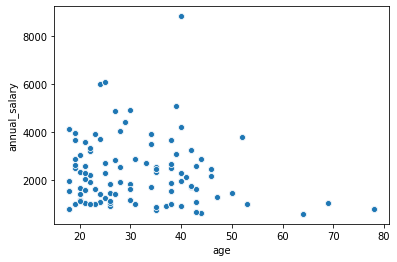

In [152]:
sns.scatterplot(x=predsalary.age,y= predsalary.annual_salary)

In [153]:
predsalary = predsalary.filter(['gender','movement','merchant_code','balance','amount','annual_salary'])

In [154]:
predsalary = predsalary.reset_index()
del predsalary['index']

In [155]:
predsalary

,gender,movement,merchant_code,balance,amount,annual_salary
0,M,credit,0.0,8342.11,3903.95,3903
1,F,credit,0.0,2040.58,1626.48,1626
2,M,credit,0.0,3158.51,983.36,983
3,M,credit,0.0,2517.66,1408.08,1408
4,F,credit,0.0,2271.79,1068.04,1068
...,...,...,...,...,...,...
878,M,credit,0.0,9378.51,1098.91,1098
879,F,credit,0.0,3440.01,1158.15,1158
880,M,credit,0.0,11381.44,1043.12,1043
881,F,credit,0.0,11454.52,1395.49,1395


In [156]:
predsalary.corr()

,merchant_code,balance,amount,annual_salary
merchant_code,NaN,NaN,NaN,NaN
balance,NaN,1.000000,0.287501,0.287501
amount,NaN,0.287501,1.000000,1.000000
annual_salary,NaN,0.287501,1.000000,1.000000


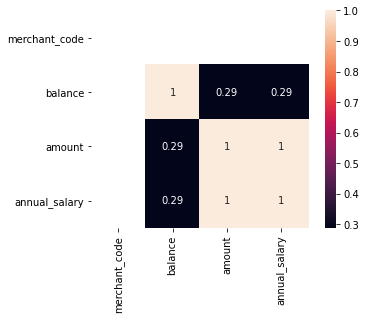

In [157]:
ax = sns.heatmap(predsalary.corr(),annot=True,square =True)

In [160]:
x= predsalary.drop('annual_salary',axis = 1)
y = predsalary['annual_salary']

In [161]:
print(x.shape)
print(y.shape)

(883, 5)
(883,)


In [162]:
dum_1= pd.get_dummies(x.gender)
dum_2= pd.get_dummies(x.movement)

In [163]:
x = pd.concat([x,dum_1,dum_2],axis ='columns')

In [164]:
x

,gender,movement,merchant_code,balance,amount,F,M,credit
0,M,credit,0.0,8342.11,3903.95,0,1,1
1,F,credit,0.0,2040.58,1626.48,1,0,1
2,M,credit,0.0,3158.51,983.36,0,1,1
3,M,credit,0.0,2517.66,1408.08,0,1,1
4,F,credit,0.0,2271.79,1068.04,1,0,1
...,...,...,...,...,...,...,...,...
878,M,credit,0.0,9378.51,1098.91,0,1,1
879,F,credit,0.0,3440.01,1158.15,1,0,1
880,M,credit,0.0,11381.44,1043.12,0,1,1
881,F,credit,0.0,11454.52,1395.49,1,0,1


In [165]:
x=x.drop(['gender','movement'],axis =1)

In [166]:
x

,merchant_code,balance,amount,F,M,credit
0,0.0,8342.11,3903.95,0,1,1
1,0.0,2040.58,1626.48,1,0,1
2,0.0,3158.51,983.36,0,1,1
3,0.0,2517.66,1408.08,0,1,1
4,0.0,2271.79,1068.04,1,0,1
...,...,...,...,...,...,...
878,0.0,9378.51,1098.91,0,1,1
879,0.0,3440.01,1158.15,1,0,1
880,0.0,11381.44,1043.12,0,1,1
881,0.0,11454.52,1395.49,1,0,1


In [169]:
from sklearn.model_selection import train_test_split

In [170]:
x_train,x_test,y_train,y_test=  train_test_split(x,y,test_size = 0.2,random_state=0)

In [171]:
from sklearn.linear_model import LinearRegression

In [172]:
lr = LinearRegression() 

In [173]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [174]:
lr.predict(x_test)

array([2538.13044691,  920.28831298, 1001.62024725,  920.28634495,
       3578.06877762, 1098.39732143,  781.94584091, 4131.62777867,
       1157.71830188, 2587.45865111, 1436.55103773, 1224.89705919,
        724.90207355, 1636.27705948, 2839.66983687, 3785.1971003 ,
       1710.94335035, 2572.35756204, 2854.20663998, 3194.46071487,
       2279.81585123, 1946.11913655, 2646.8479911 , 2587.4623713 ,
       1626.03840743, 1407.55919871,  781.94259733, 1272.03709354,
       6023.83820399, 1001.61989871, 1407.5594651 , 2306.16357866,
       2538.12957798, 1395.05137713,  724.90171901, 1915.97576256,
       2639.21076618, 2717.98300355, 1433.46044522,  760.90890756,
       1224.89773314, 1157.7175307 , 2023.22184019, 2717.98023119,
       1395.04991307, 4054.18741823,  995.7323656 , 1559.69149582,
       1138.36062079, 1626.03550662, 2839.66794193, 1880.43712637,
       2646.84682409, 1757.30665392, 3976.95087974, 1042.61390312,
       2023.22437581, 4863.07973665, 1915.97316016, 4910.35751

In [175]:
lr.score(x_test,y_test)

0.999999934015427

In [177]:
from sklearn.tree import DecisionTreeRegressor

In [178]:
dt = DecisionTreeRegressor()

In [180]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [182]:
dt.score(x_test,y_test)

0.999704924395396

In [183]:
dt.predict(x_test)

array([2538.,  920., 1002.,  920., 3578., 1098.,  782., 4132., 1158.,
       2588., 1436., 1225.,  725., 1636., 2840., 3785., 1711., 2572.,
       2854., 3195., 2280., 1946., 2647., 2588., 1626., 1408.,  782.,
       1272., 6024., 1002., 1408., 2306., 2538., 1395.,  725., 1916.,
       2639., 2718., 1433.,  761., 1225., 1158., 2023., 2718., 1395.,
       4054.,  996., 1560., 1138., 1626., 2840., 1880., 2647., 1757.,
       3977., 1043., 2023., 5103., 1916., 4910., 2101., 3903., 1099.,
        725., 1272., 1560., 1560., 1225., 1013., 1043., 3785., 1946.,
       2101., 1880.,  576.,  917.,  725.,  917., 1541.,  761., 4132.,
       1946.,  970., 2485., 1013., 1880.,  970., 1757., 2306., 4405.,
       2588., 2887.,  996., 2886., 1059., 1928., 1396.,  596., 2470.,
        782., 1640., 2443.,  983., 1436., 2306., 2280., 1043., 2718.,
       4054., 1952.,  996., 1068., 2179., 1843., 1013., 2280., 4054.,
       2485., 1541., 2840.,  664.,  596.,  983., 1946., 1158.,  920.,
       3026., 3071.,